# Task 5: To explore Bussiness Analytics

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
data=pd.read_csv("https://raw.githubusercontent.com/samikshaxt/Task-5-To-explore-Bussiness-Analytics/master/SampleSuperstore.csv")

In [68]:
# understanding the data

In [69]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [70]:
data.shape

(9994, 13)

In [71]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [72]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [73]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [74]:
data['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [75]:
data['Profit'].unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

In [76]:
#cleaning the data

In [77]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [78]:
SampleStore=data.drop(['State','Ship Mode','Postal Code'],axis=1)
SampleStore.head()

,Segment,Country,City,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Consumer,United States,Henderson,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Consumer,United States,Henderson,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Corporate,United States,Los Angeles,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Consumer,United States,Fort Lauderdale,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Consumer,United States,Fort Lauderdale,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [79]:
#relationship analysis

In [80]:
corelation=SampleStore.corr()

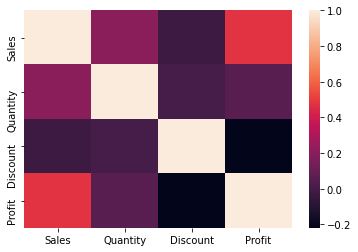

In [81]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=False)

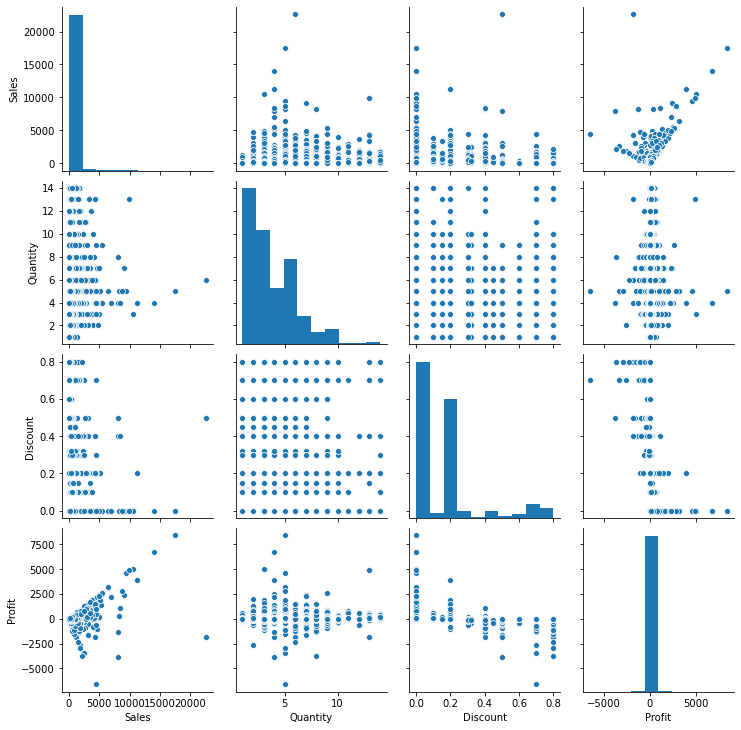

In [82]:
sns.pairplot(SampleStore)

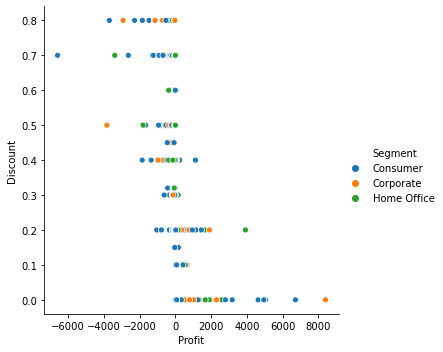

In [83]:
sns.relplot(x='Profit',y='Discount',hue='Segment',data=SampleStore)

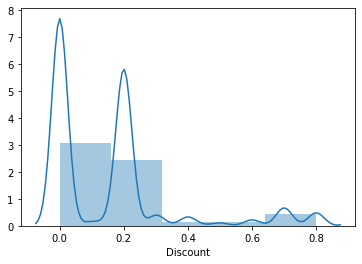

In [84]:
sns.distplot(SampleStore['Discount'],bins=5)

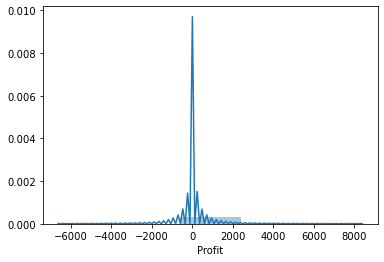

In [85]:
sns.distplot(SampleStore['Profit'],bins=5)

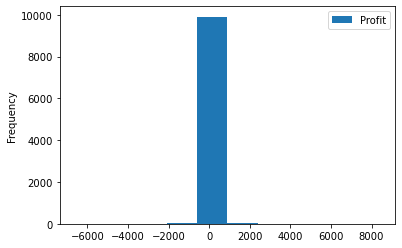

In [47]:
SampleStore.plot(kind='hist',x='Discount',y='Profit')
plt.show()

In [49]:
data[data.Profit==data.Profit.max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [50]:
data[data.Profit==data.Profit.min()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


In [52]:
city = data.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
city.head(10)


,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


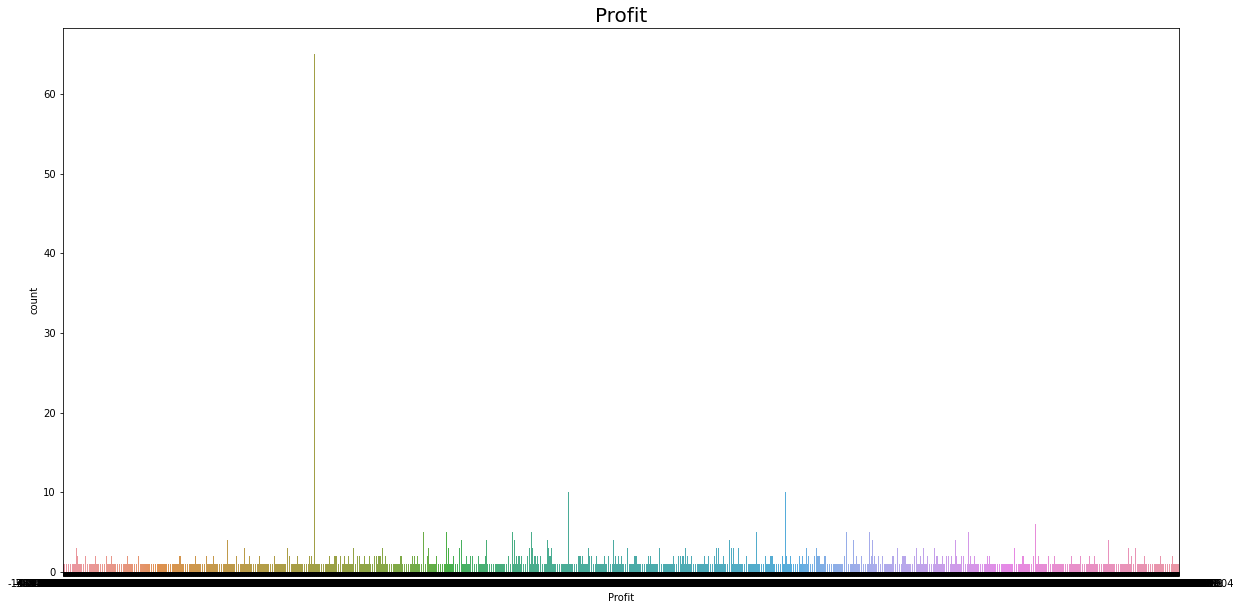

In [55]:
plt.figure(figsize = (20,10))
sns.countplot(data['Profit'])
plt.title("Profit",size = 20)
plt.show()


In [57]:
#Regionwise Profit

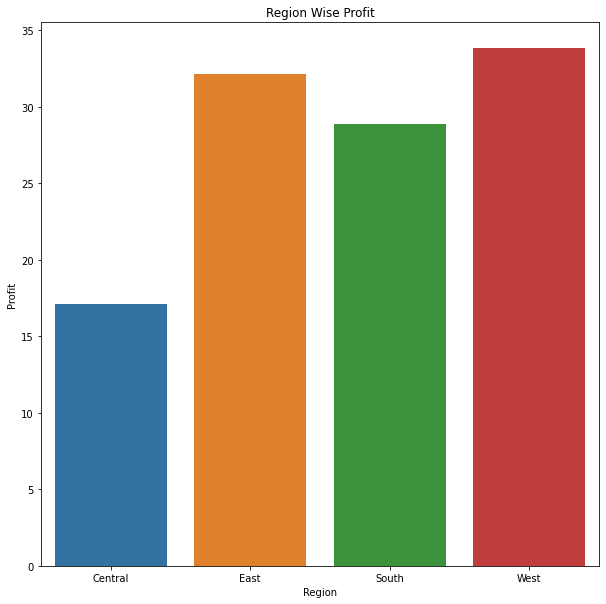

In [61]:
region_profit=data[['Profit','Region']].groupby(by='Region').mean()
plt.figure(figsize=(10,10))
plt.title('Region Wise Profit')
sns.barplot(x = region_profit.index,
            y = region_profit.Profit,
            data = region_profit);

